# Import libs

In [1]:
import pandas as pd
import numpy as np
from knn.knn import knn
from dmc.dmc import dmc
from kmeans.kmeans import kmeans
from naive_bayes_classifier.naive_bayes_classifier import naive_bayes_classifier
from bayes_classifier.bayes_classifier import bayes_classifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Breast Cancer dataset

In [2]:
Xy = pd.read_csv('./datasets/breast_cancer.csv')
Xy.dropna(inplace=True)
X = Xy.drop(['diagnosis', 'id'], axis=1)
y = Xy['diagnosis']

# Running the tests and computing informations

In [3]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
kmeans_hit_rate_list = []
nb_hit_rate_list = []
b_hit_rate_list = []

knn_std_dev = 0
dmc_std_dev = 0
kmeans_std_dev = 0
nb_std_dev = 0
b_std_dev = 0

knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
kmeans_confusion_matrix_list = []
nb_confusion_matrix_list = []
b_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    kmeans_model = kmeans(k=25, type_distance_calc='euclidean', number_iteration=300)
    kmeans_model.fit(X_train, y_train)

    nb_model = naive_bayes_classifier()
    nb_model.fit(X_train, y_train)

    b_model = bayes_classifier()
    b_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    kmeans_hit_rate_list.append(kmeans_model.score(X_test, y_test))
    nb_hit_rate_list.append(nb_model.score(X_test, y_test))
    b_hit_rate_list.append(b_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    kmeans_y_pred = [kmeans_model.predict(x) for x in X_test.values]
    nb_y_pred = [nb_model.predict(x) for x in X_test.values]
    b_y_pred = [b_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    kmeans_confusion_matrix_list.append(confusion_matrix(y_test, kmeans_y_pred))
    nb_confusion_matrix_list.append(confusion_matrix(y_test, nb_y_pred))
    b_confusion_matrix_list.append(confusion_matrix(y_test, b_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
kmeans_std_dev = np.std(kmeans_hit_rate_list)
nb_std_dev = np.std(nb_hit_rate_list)
b_std_dev = np.std(b_hit_rate_list)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

# Showing knn informations computed

In [4]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.956140350877193, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9473684210526315, 0.9649122807017544, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.8859649122807017, 0.9473684210526315, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9473684210526315, 0.9912280701754386, 0.9122807017543859]

Accuracy:
0.9289473684210524

Standard Deviation:
0.02302527148843279

Confusion Matrix:
    M   B
M  40   4
B   1  69
    M   B
M  46   6
B   3  59
    B   M
B  67   8
M   1  38
    B   M
B  65   6
M   3  40
    M   B
M  33   3
B   3  75
    M   B
M  30   3
B   1  80
    B   M
B  67   3
M   6  38
    M   B
M  38   4
B   4  68
    B   M
B  71   1
M   8  34
    B   M
B  70   2
M   8  34
    B   M
B  66   3
M   7  38
    M   B
M  40   7
B   6  61
    B   M
B  71   3
M   3  37
    B   M
B  63   5
M   4  42
    B   M
B  61   4
M   6  43
    

In [5]:
confusion_matrix_mean(knn_confusion_matrix_list)

,M,B
M,38,4
B,3,67


# Showing dmc informations computed

In [6]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.9035087719298246, 0.8421052631578947, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.868421052631579, 0.8596491228070176, 0.9298245614035088, 0.868421052631579, 0.8771929824561403, 0.8859649122807017, 0.8596491228070176, 0.9035087719298246, 0.9035087719298246, 0.8771929824561403]

Accuracy:
0.8934210526315789

Standard Deviation:
0.02438454495424148

Confusion Matrix:
    M   B
M  33  11
B   0  70
    M   B
M  35  17
B   1  61
    B   M
B  74   1
M   7  32
    B   M
B  70   1
M   9  34
    M   B
M  28   8
B   1  77
    M   B
M  24   9
B   0  81
    B   M
B  69   1
M  10  34
    M   B
M  31  11
B   0  72
    B   M
B  71   1
M  11  31
    B   M
B  71   1
M  10  32
    B   M
B  68   1
M  14  31
    M   B
M  33  14
B   2  65
    B   M
B  73   1
M   7  33
    B   M
B  65   3
M  12  34
    B   M
B  62   3
M  11  38
    B

In [7]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,M,B
M,31,11
B,0,70


# Showing kmeans informations computed

In [8]:
print('----------------- KMEANS model -----------------')
print('Hit rate:')
print(kmeans_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(kmeans_hit_rate_list)/len(kmeans_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(kmeans_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in kmeans_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KMEANS model -----------------
Hit rate:
[0.9385964912280702, 0.9122807017543859, 0.9473684210526315, 0.9298245614035088, 0.9649122807017544, 0.9473684210526315, 0.9210526315789473, 0.9122807017543859, 0.956140350877193, 0.9210526315789473, 0.9210526315789473, 0.8771929824561403, 0.9385964912280702, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9649122807017544, 0.9122807017543859]

Accuracy:
0.9285087719298245

Standard Deviation:
0.020993154287323377

Confusion Matrix:
    M   B
M  38   6
B   1  69
    M   B
M  44   8
B   2  60
    B   M
B  70   5
M   1  38
    B   M
B  68   3
M   5  38
    M   B
M  34   2
B   2  76
    M   B
M  27   6
B   0  81
    B   M
B  66   4
M   5  39
    M   B
M  35   7
B   3  69
    B   M
B  71   1
M   4  38
    B   M
B  70   2
M   7  35
    B   M
B  68   1
M   8  37
    M   B
M  40   7
B   7  60
    B   M
B  72   2
M   5  35
    B   M
B  63   5
M   6  40
    B   M
B  59   6
M   3  46


In [9]:
confusion_matrix_mean(kmeans_confusion_matrix_list)

,M,B
M,37,5
B,2,68


# Showing naive bayes informations computed

In [10]:
print('----------------- NAIVE BAYES model -----------------')
print('Hit rate:')
print(nb_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(nb_hit_rate_list)/len(nb_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(nb_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in nb_confusion_matrix_list:
    print(matrix, end='\n')

----------------- NAIVE BAYES model -----------------
Hit rate:
[0.9649122807017544, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 1.0, 0.9298245614035088, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9035087719298246, 0.9473684210526315, 0.9122807017543859, 0.956140350877193, 0.9210526315789473, 0.8859649122807017, 0.956140350877193, 0.9385964912280702, 0.9298245614035088]

Accuracy:
0.9385964912280704

Standard Deviation:
0.02353755765789252

Confusion Matrix:
    M   B
M  41   3
B   1  69
    M   B
M  49   3
B   5  57
    B   M
B  70   5
M   3  36
    B   M
B  68   3
M   5  38
    M   B
M  36   0
B   0  78
    M   B
M  29   4
B   4  77
    B   M
B  68   2
M   3  41
    M   B
M  40   2
B   4  68
    B   M
B  70   2
M   4  38
    B   M
B  69   3
M   3  39
    B   M
B  66   3
M   4  41
    M   B
M  41   6
B   5  62
    B   M
B  70   4
M   2  38
    B   M
B  63   5
M   5  41
    B   M
B  61   4
M   1  48
    B   M
B  

In [11]:
confusion_matrix_mean(nb_confusion_matrix_list)

,M,B
M,39,3
B,3,67


# Showing bayes informations computed

In [12]:
print('----------------- BAYES model -----------------')
print('Hit rate:')
print(b_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_hit_rate_list)/len(b_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_confusion_matrix_list:
    print(matrix, end='\n')

----------------- BAYES model -----------------
Hit rate:
[0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9824561403508771, 0.9210526315789473, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9824561403508771, 0.9122807017543859, 0.9736842105263158, 0.9473684210526315, 0.9298245614035088, 0.9736842105263158, 0.9649122807017544, 0.9385964912280702]

Accuracy:
0.9592105263157894

Standard Deviation:
0.019273309247999863

Confusion Matrix:
    M   B
M  43   1
B   2  68
    M   B
M  51   1
B   3  59
    B   M
B  72   3
M   1  38
    B   M
B  69   2
M   2  41
    M   B
M  36   0
B   3  75
    M   B
M  31   2
B   0  81
    B   M
B  65   5
M   4  40
    M   B
M  41   1
B   3  69
    B   M
B  71   1
M   3  39
    B   M
B  71   1
M   2  40
    B   M
B  66   3
M   2  43
    M   B
M  45   2
B   3  64
    B   M
B  73   1
M   1  39
    B   M
B  60   8
M   2  44
    B   M
B  62   3
M   0  49
  

In [13]:
confusion_matrix_mean(b_confusion_matrix_list)

,M,B
M,40,2
B,2,68


# Choosing two columns from the last X_train and X_test to plot decision surface

In [14]:
X_train_2d, X_test_2d = X_train[['radius_mean', 'texture_mean']], X_test[['radius_mean', 'texture_mean']]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
     radius_mean  texture_mean
202        23.29         26.67
479        16.25         19.51
281        11.74         14.02
158        12.06         12.74
351        15.75         19.22
..           ...           ...
207        17.01         20.26
227        15.00         15.51
404        12.34         14.95
269        10.71         20.39
183        11.41         14.92

[455 rows x 2 columns]
Test dataset:
     radius_mean  texture_mean
405       10.940         18.59
357       13.870         16.21
491       17.850         13.23
156       17.680         20.74
392       15.490         19.97
..           ...           ...
176        9.904         18.06
46         8.196         16.84
535       20.550         20.86
133       15.710         13.93
179       12.810         13.06

[114 rows x 2 columns]


# Training the models with the new dataset 2d

In [15]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
kmeans_model = kmeans(k=25, type_distance_calc='euclidean', number_iteration=300)
kmeans_model.fit(X_train_2d, y_train)
nb_model = naive_bayes_classifier()
nb_model.fit(X_train_2d, y_train)
b_model = bayes_classifier()
b_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

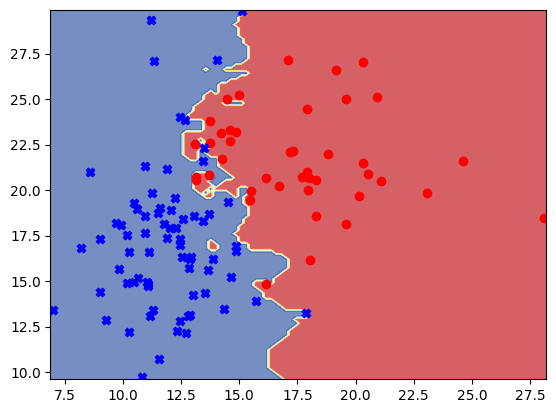

In [16]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

M = np.where(knn_y_pred == 'M')
B = np.where(knn_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()

# Plotting dmc decision surface

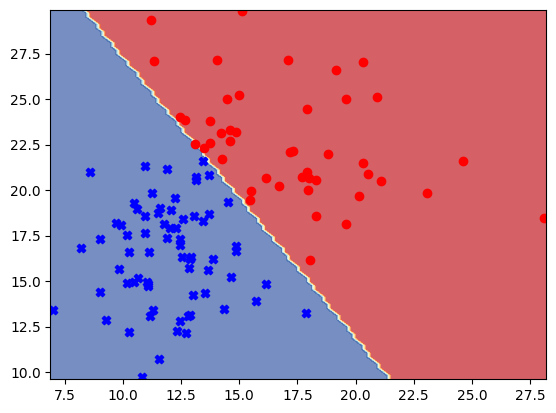

In [17]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

M = np.where(dmc_y_pred == 'M')
B = np.where(dmc_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()

# Plotting kmeans decision surface

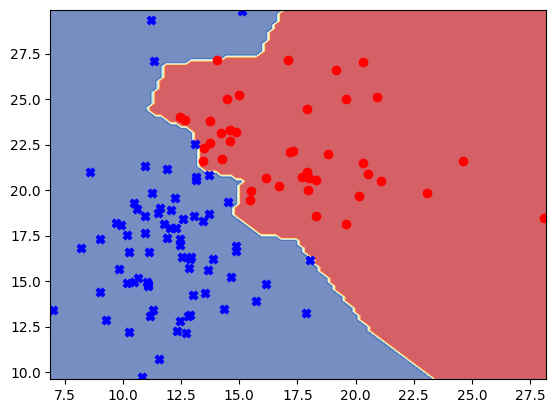

In [18]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[kmeans_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

kmeans_y_pred = np.array([kmeans_model.predict(x) for x in X_test_2d.values])

M = np.where(kmeans_y_pred == 'M')
B = np.where(kmeans_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()

# Plotting naive bayes decision surface

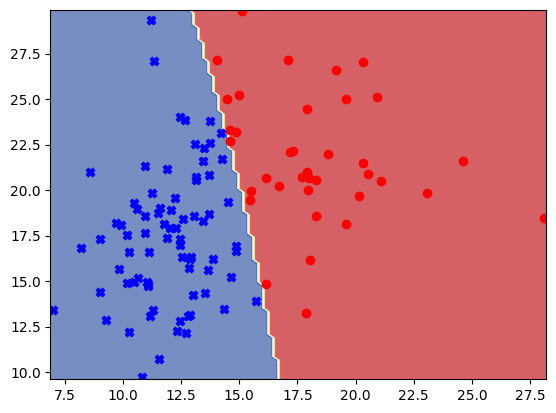

In [19]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[nb_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

nb_y_pred = np.array([nb_model.predict(x) for x in X_test_2d.values])

M = np.where(nb_y_pred == 'M')
B = np.where(nb_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()

# Plotting bayes decision surface

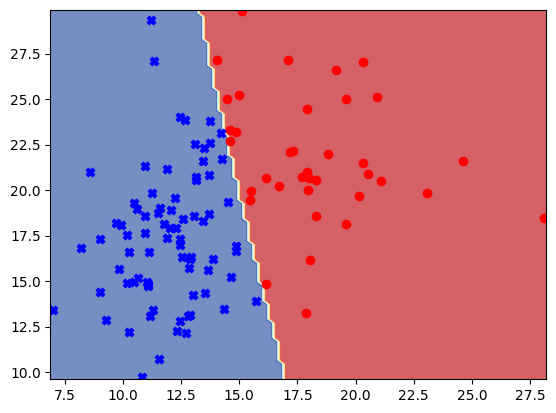

In [20]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_y_pred = np.array([b_model.predict(x) for x in X_test_2d.values])

M = np.where(b_y_pred == 'M')
B = np.where(b_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()